
## CSM354 - MACHINE LEARNING - I(PROJECT-CA1)


***Name            : Nuni V Vijay Sai***

***Registration No : 12112489***

***Section         : K21UN***

***Roll No         :RK21UNB39***








# Phishing Website Detection Using Machine Learning Techniques

## **1. Objective:**
A phishing website is a common social engineering method that mimics trustful uniform resource locators (URLs) and webpages. The objective of this project is to train machine learning models and deep neural nets on the dataset created to predict phishing websites. Both phishing and benign URLs of websites are gathered to form a dataset and from them required URL and website content-based features are extracted. The performance level of each model is measures and compared.


## **2. Loading Data:**

The features are extracted and store in the csv file. The working of this can be seen in the 'Phishing Website Detection_Feature Extraction.ipynb' file.

The reulted csv file is uploaded to this notebook and stored in the dataframe.

In [30]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
#Loading the data
df = pd.read_csv('5.urldata.csv')
df.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


## **3. Familiarizing with Data**
In this step, few dataframe methods are used to look into the data and its features.

In [34]:
#Checking the shape of the dataset
df.shape

(10000, 18)

In [36]:
#Listing the features of the dataset
df.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [38]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

## **4. Visualizing the data**
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

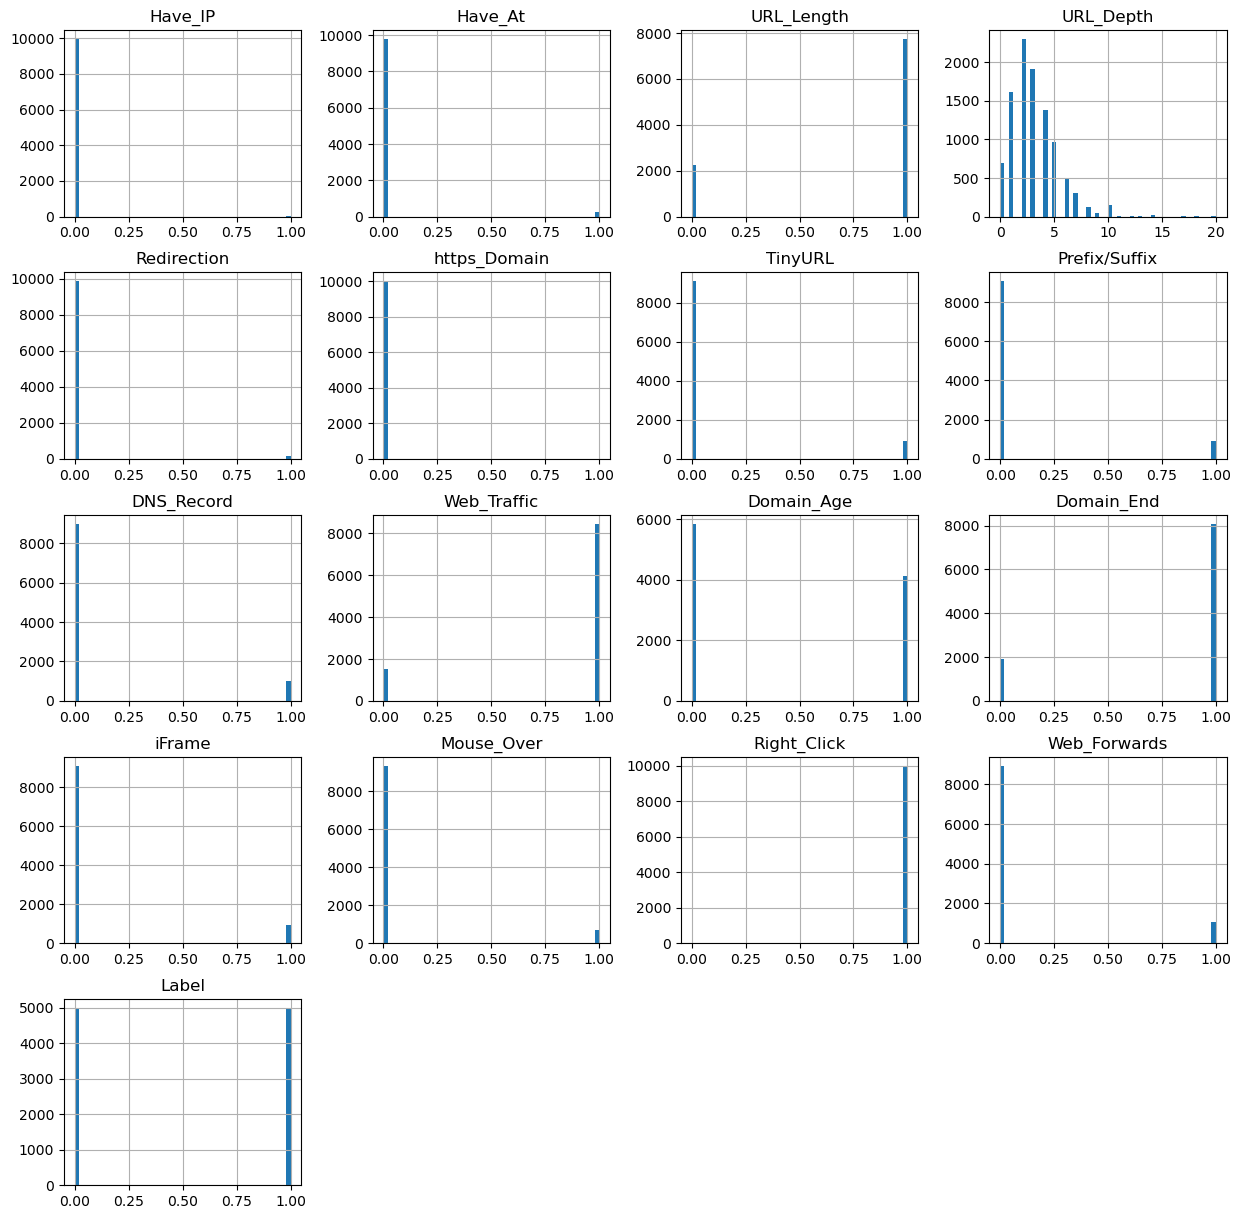

In [41]:
#Plotting the data distribution
df.hist(bins = 50,figsize = (15,15))
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12396\2594808200.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


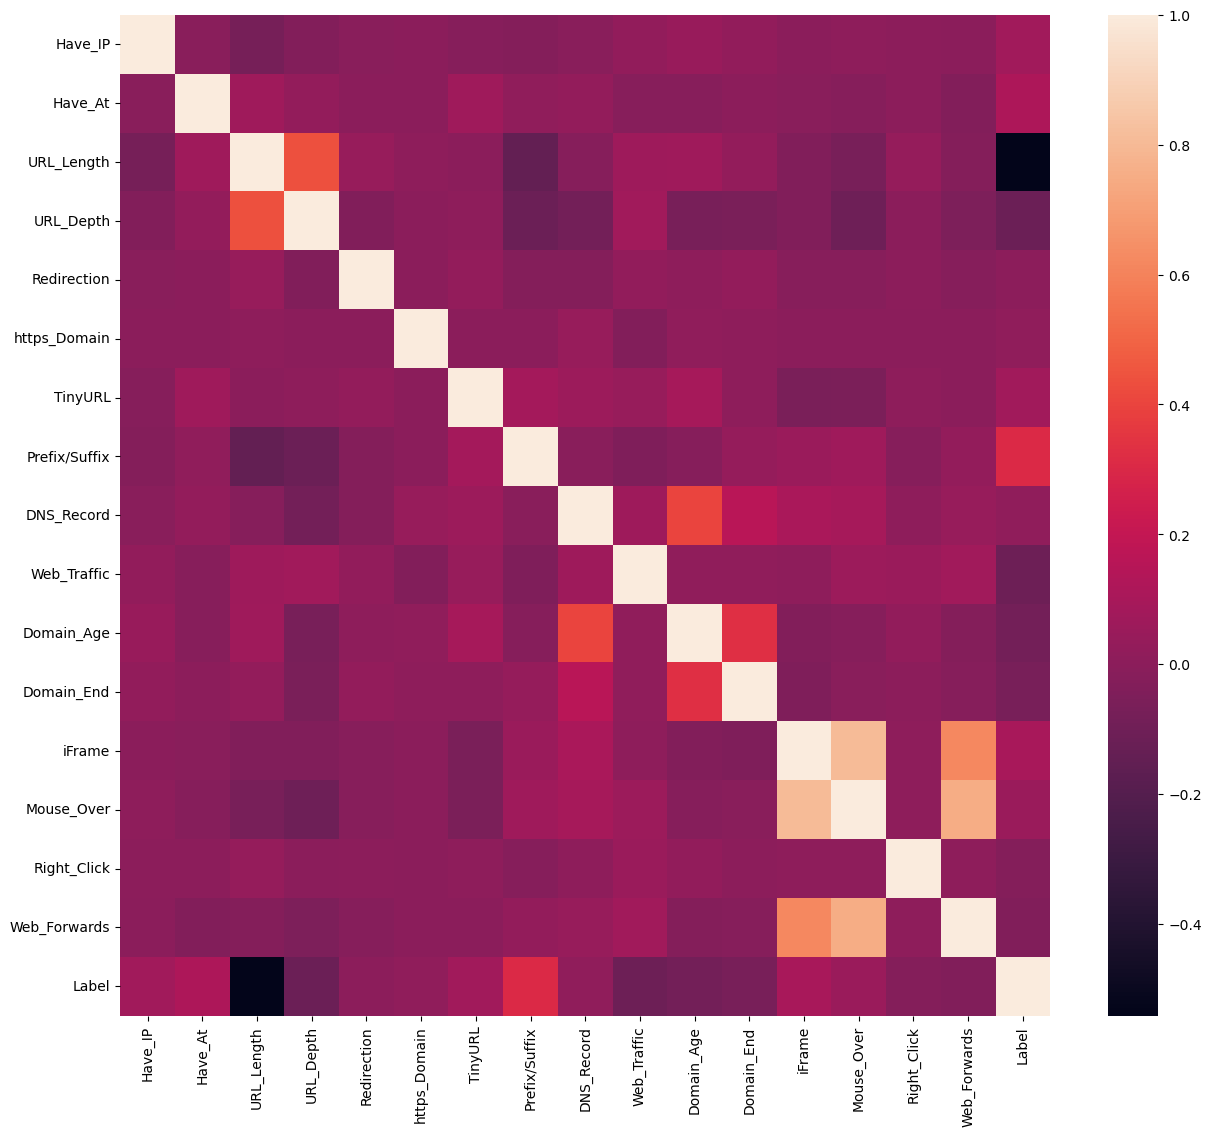

In [42]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(df.corr())
plt.show()

## **5. Data Preprocessing & EDA**
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [44]:
df.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the *'Domain'* column from the dataset. 

In [46]:
#Dropping the Domain column
df = df.drop(['Domain'], axis = 1).copy()

This leaves us with 16 features & a target column. The *'URL_Depth'* maximum value is 20. According to my understanding, there is no necessity to change this column.

In [49]:
#checking the data for null or missing values
df.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In the feature extraction file, the extracted features of legitmate & phishing url datasets are just concatenated without any shuffling. This resulted in top 5000 rows of legitimate url data & bottom 5000 of phishing url data. 

To even out the distribution while splitting the data into training & testing sets, we need to shuffle it. This even evades the case of overfitting while model training.

In [55]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
2,0,0,1,2,0,0,0,0,0,1,0,0,0,0,1,0,0
3,0,0,1,6,0,0,0,0,0,1,0,1,0,0,1,0,0
4,0,1,1,2,0,0,0,0,0,1,0,1,0,0,1,0,0


From the above execution, it is clear that the data doesnot have any missing values.

By this, the data is throughly preprocessed & is ready for training.

## **6. Splitting the Data**

In [59]:
# Sepratating & assigning features and target columns to X & y
y = df['Label']
X = df.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [61]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

In [63]:
#importing packages
from sklearn.metrics import accuracy_score

In [65]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
    ML_Model.append(model)
    acc_train.append(round(a, 3))
    acc_test.append(round(b, 3))

### **7.1. Support Vector Machines**

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

In [68]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [69]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

**Performance Evaluation:**

In [73]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.799
SVM : Accuracy on test Data: 0.813


**Storing the results:**

In [76]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

**7.2 Logistic Regression**

In [79]:

from sklearn.linear_model import LogisticRegression
# Initializing the Logistic Regression classifier
logistic_regression = LogisticRegression()
logistic_regression = LogisticRegression(max_iter=10000) 
# Training the classifier
logistic_regression.fit(X_train, y_train)

# Making predictions on the testing set

y_pred = logistic_regression.predict(X_test)
y_test_LR = logistic_regression.predict(X_test)
y_train_LR = logistic_regression.predict(X_train)
# Calculating accuracy
acc_train_LR = accuracy_score(y_train,y_train_LR)
acc_test_LR = accuracy_score(y_test,y_test_LR)
storeResults("Logistic Regression", acc_train_LR, acc_test_LR)

print("Logistic Regression: Accuracy on training Data: {:.3f}".format(acc_train_LR))
print("Logistic Regression: Accuracy on test Data: {:.3f}".format(acc_test_LR))

Logistic Regression: Accuracy on training Data: 0.796
Logistic Regression: Accuracy on test Data: 0.810


**7.3 Naive Bayes**

In [84]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, y_train)

# Making predictions on the testing set
y_pred_NB = naive_bayes_classifier.predict(X_test)
y_test_NB = naive_bayes_classifier.predict(X_test)
y_train_NB = naive_bayes_classifier.predict(X_train)

# Calculating accuracy
acc_test_NB = accuracy_score(y_test, y_pred_NB)
acc_train_NB = accuracy_score(y_train, y_train_NB)
# Store results for AdaBoost model
# Store results for AdaBoost model
storeResults("Naive Bayes", acc_train_NB, acc_test_NB)
print("Naive Bayes: Accuracy on test Data: {:.3f}".format(acc_test_NB))
print("Naive Bayes: Accuracy on training Data: {:.3f}".format(acc_train_NB))


Naive Bayes: Accuracy on test Data: 0.801
Naive Bayes: Accuracy on training Data: 0.789


**7.4 K-nearest neighbour**

In [131]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Ensure data types are correct
X = X.astype(np.float64)
y = y.astype(np.int64)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to NumPy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the KNN classifier with the number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Making predictions on the testing set
y_pred_KNN = knn_classifier.predict(X_test)
y_train_KNN = knn_classifier.predict(X_train)

# Calculating accuracy
acc_test_KNN = accuracy_score(y_test, y_pred_KNN)
acc_train_KNN = accuracy_score(y_train, y_train_KNN)

# Store results (assuming you have a function `storeResults` defined)
storeResults("KNN", acc_train_KNN, acc_test_KNN)

print("KNN: Accuracy on test Data: {:.3f}".format(acc_test_KNN))
print("KNN: Accuracy on training Data: {:.3f}".format(acc_train_KNN))



KNN: Accuracy on test Data: 0.834
KNN: Accuracy on training Data: 0.856


## **8. Comparision of Models**
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [110]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,SVM,0.799,0.813
1,Logistic Regression,0.796,0.810
2,Naive Bayes,0.790,0.802
3,KNN,0.856,0.834
4,KNN,0.856,0.834


In [112]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
3,KNN,0.856,0.834
4,KNN,0.856,0.834
0,SVM,0.799,0.813
1,Logistic Regression,0.796,0.810
2,Naive Bayes,0.790,0.802


For the above comparision, it is clear that the KNN classifier works well with this dataset.

So, saving the model for future use.

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.63      0.57      1012
           1       0.50      0.38      0.43       988

    accuracy                           0.51      2000
   macro avg       0.51      0.50      0.50      2000
weighted avg       0.51      0.51      0.50      2000



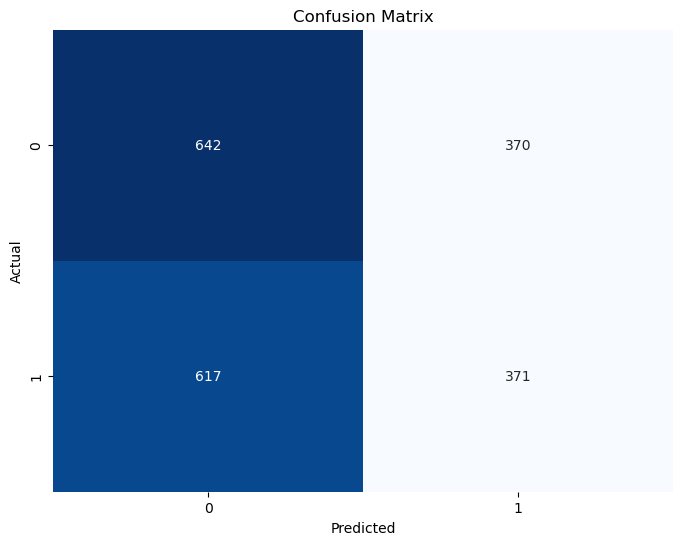

In [114]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

***Here is the Confusion Matrix and Classification Report for Xgboost Model***

In [116]:
import pickle

# Assuming `knn_classifier` is your trained KNN model
pickle.dump(knn_classifier, open("KNNClassifier.pickle.dat", "wb"))


**Testing the saved model:**

In [119]:
# Load the KNN classifier from file
knn_classifier_loaded = pickle.load(open("KNNClassifier.pickle.dat", "rb"))

# Now you can use `knn_classifier_loaded` to make predictions
y_pred_loaded = knn_classifier_loaded.predict(X_test)


## 9 . Conclusion


***In conclusion, our machine learning-based approach successfully identified phishing websites, contributing to cybersecurity efforts. While our models showed promise, further exploration into advanced techniques could enhance detection accuracy. This research highlights the importance of data-driven methods in combating online threats. Moving forward, continued innovation is essential to stay ahead of evolving phishing tactics.***